<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/DPHI_covid19_acc_86_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1BFc2Lt2N1swO8BKRvLMEyUhLzF52RFvr',
dest_path='content/covid_image_data.zip',
unzip=True)

Unzipping...Done.


In [2]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
labels = pd.read_csv("/content/content/covid_image_data/Training_set_covid.csv")

labels.head() 
file_paths = [[fname, '/content/content/covid_image_data/train/' + fname] for fname in labels['filename']]

if len(labels) == len(file_paths):
  print('Number of labels i.e. ', len(labels), 'matches the number of filenames i.e. ', len(file_paths))
else:
  print('Number of labels does not match the number of filenames')

images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
images.head()


train_data = pd.merge(images, labels, how = 'inner', on = 'filename')
train_data.head()

Number of labels i.e.  3479 matches the number of filenames i.e.  3479


,filename,filepaths,label
0,Image_1.jpg,/content/content/covid_image_data/train/Image_...,1
1,Image_2.jpg,/content/content/covid_image_data/train/Image_...,0
2,Image_3.jpg,/content/content/covid_image_data/train/Image_...,0
3,Image_4.jpg,/content/content/covid_image_data/train/Image_...,0
4,Image_5.jpg,/content/content/covid_image_data/train/Image_...,0


In [4]:
test_image_order = pd.read_csv("/content/content/covid_image_data/Testing_set_covid.csv")
test_image_order.head()

file_paths_test = [[fname, '/content/content/covid_image_data/test/' + fname] for fname in test_image_order['filename']]

test_images = pd.DataFrame(file_paths_test, columns=['filename', 'filepaths'])
test_images.head()


,filename,filepaths
0,Image_1.jpg,/content/content/covid_image_data/test/Image_1...
1,Image_2.jpg,/content/content/covid_image_data/test/Image_2...
2,Image_3.jpg,/content/content/covid_image_data/test/Image_3...
3,Image_4.jpg,/content/content/covid_image_data/test/Image_4...
4,Image_5.jpg,/content/content/covid_image_data/test/Image_5...


Text(0.5, 1.0, 'Noise Removal')

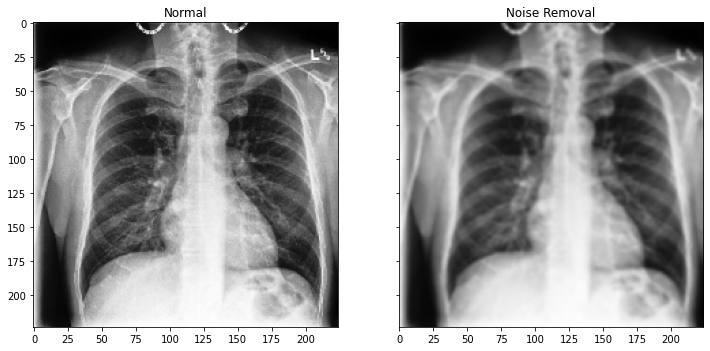

In [ ]:
random_index = np.random.randint(len(train_data))

img = cv2.imread(train_data['filepaths'][random_index], cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img_denoise = cv2.GaussianBlur(img,(5,5),0)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,10))

ax1.imshow(img,cmap='gray')
ax2.imshow(img_denoise,cmap='gray')

ax1.set_title('Normal')
ax2.set_title('Noise Removal')

In [5]:
data = [] 
image_size = 224 
test_pixel_data = []

for i in range(len(train_data)):

  img_array = cv2.imread(train_data['filepaths'][i], cv2.COLOR_BGR2RGB) 

  new_img_array = cv2.resize(img_array, (image_size, image_size))
  #new_img_array = cv2.GaussianBlur(new_img_array,(5,5),0)
  data.append([new_img_array, train_data['label'][i]])


for i in range(len(test_images)):

  img_array = cv2.imread(test_images['filepaths'][i], cv2.COLOR_BGR2RGB) 

  new_img_array = cv2.resize(img_array, (image_size, image_size))
  #new_img_array = cv2.GaussianBlur(new_img_array,(5,5),0)
  test_pixel_data.append(new_img_array)

In [6]:
print(len(data),len(test_pixel_data))

3479 870


In [7]:
np.random.shuffle(data)

In [8]:
x = []
y = []
for image in data:
  x.append(image[0])
  y.append(image[1])

# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

In [9]:
np.unique(y, return_counts=True)

(array([0, 1]), array([3073,  406]))

In [ ]:
print(pd.Series(y).value_counts())

0    3073
1     406
dtype: int64


In [ ]:
def print_random_samples():
    index_0 = []
    index_1 = []

    for i,v in enumerate(y):
      if v == 1:
        index_1.append(i)
      else:
        index_0.append(i)

    plot_index_0 = np.random.choice(index_0)
    plot_index_1 = np.random.choice(index_1)

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,10))

    ax1.imshow(x[plot_index_0],cmap='gray')
    ax2.imshow(x[plot_index_1],cmap='gray')

    ax1.set_title(y[plot_index_0])
    ax2.set_title(y[plot_index_1])
     

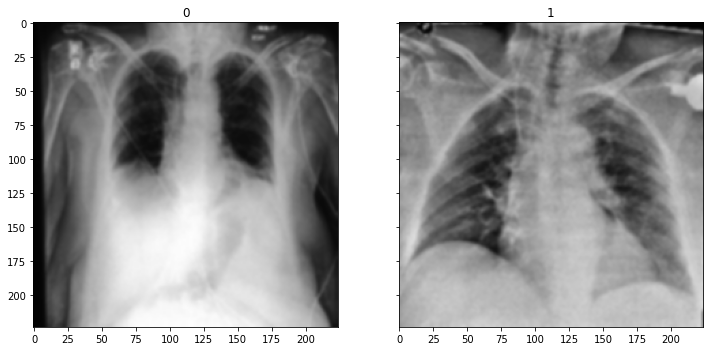

In [ ]:
print_random_samples()

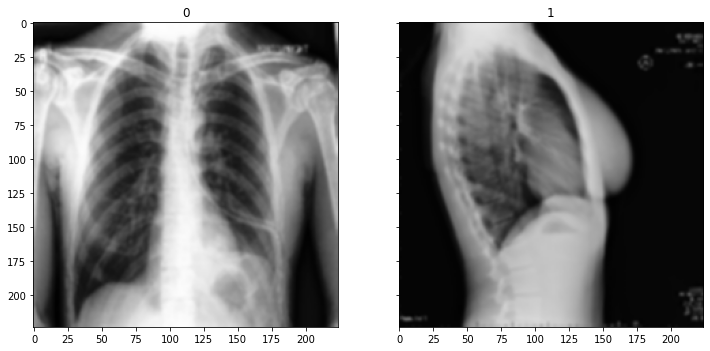

In [ ]:
print_random_samples()

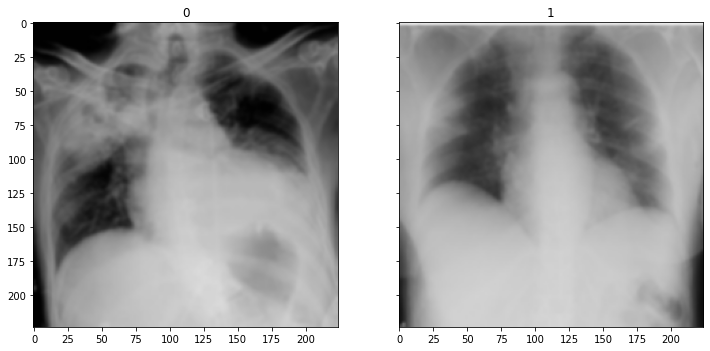

In [ ]:
print_random_samples()

In [ ]:
 pd.Series(y).value_counts()

0    3073
1     406
dtype: int64

In [ ]:
difference = pd.Series(y).value_counts()[0] - pd.Series(y).value_counts()[1]
print(difference)

2667


In [ ]:
# def flip (image):
    
#     flipped = np.fliplr(image)
#     return flipped

# def translation (image):
    
#     x= np.random.randint(-50,50)
#     y = np.random.randint(-50,50)
#     rows,cols,z = image.shape
#     M = np.float32([[1,0,x],[0,1,y]])
#     translate = cv2.warpAffine(image,M,(cols,rows))
    
#     return translate

# def blur (image):
    
#     x = random.randrange(1,5,2)
#     blur = cv2.GaussianBlur(image,(x,x),cv.BORDER_DEFAULT)
#     return blur

# def apply_aug (image):
    
#     number = np.random.randint(1,3)
    
#     if number == 1:
#         image= flip(image)
                
#     if number == 2:
#         image= translation(image)
                
#     if number == 3:
#         image= blur(image)
    
#     return image


# def oversample_images(difference,X_train,y_train):
  
#   counter = 0
#   new_image = []
#   new_label = []

#   for i,item in enumerate(X_train):

#     if y_train[i] == 1 and counter < difference:

#       for k in range(3):
#         image = apply_aug(item)

#         new_image.append(image)
#         new_label.append(1)

#         counter += 1
      
#     else:
#       new_image.append(item)
#       new_label.append(0)

#   return np.array(new_image),np.array(new_label)



# x_oversample,y_oversample = oversample_images(difference,x,y)

# print(pd.Series(y_oversample).value_counts())

In [10]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state = 42,stratify=y)

In [11]:
test_pixel_data = np.array(test_pixel_data)

test_pixel_data = test_pixel_data/255

print(X_train.shape,X_val.shape,test_pixel_data.shape)

(2783, 224, 224, 3) (696, 224, 224, 3) (870, 224, 224, 3)


In [12]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(X_train,y_train,batch_size=32)

val_generator = val_datagen.flow(X_val,y_val,batch_size=32)

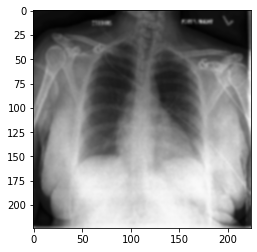

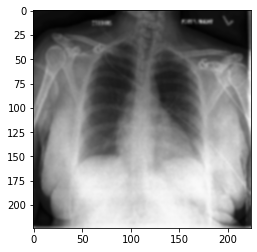

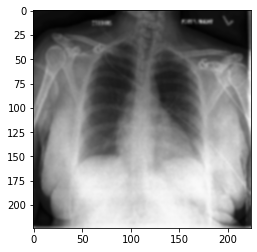

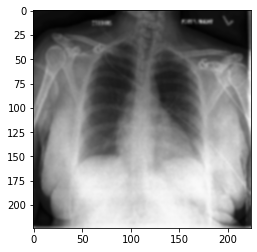

In [ ]:
sample = X_train[100]
sample = np.expand_dims(sample,axis=0)
i = 0
for x in train_datagen.flow(sample,batch_size=1):
  plt.figure(i)
  plt.imshow(x[0],cmap='gray')

  i+= 1
  if i%4 == 0:
    break

In [ ]:
pd.Series(y_val).value_counts(normalize=True)

0    0.883621
1    0.116379
dtype: float64

In [ ]:
pd.Series(y_train).value_counts(normalize=True)

0    0.88322
1    0.11678
dtype: float64

In [ ]:
print(X_train.shape,X_val.shape)

(2783, 224, 224, 3) (696, 224, 224, 3)


In [13]:
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


In [14]:
from keras.applications import VGG16

conv_base = VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [15]:
train_layers = [layer.name for layer in conv_base.layers[::-1][:5]]

train_layers

['block5_pool', 'block5_conv3', 'block5_conv2', 'block5_conv1', 'block4_pool']

In [16]:
model = tf.keras.models.Sequential()

model.add(conv_base)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

#conv_base.trainable = False

for layer in conv_base.layers:
  if layer.name in train_layers:
    layer.trainable = True
  else:
    layer.trainable = False


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
loss='binary_crossentropy',
metrics=[get_f1])

steps_per_epoch=len(trainX1) // BS,
validation_steps=len(testX1) // BS,

In [17]:
#model.fit(X_train, y_train, epochs=10, batch_size=16,validation_data=(X_val,y_val))

model.fit(train_generator,steps_per_epoch=87,epochs=30,validation_data=val_generator,validation_steps=22,class_weight={0:1,1:2})

Epoch 1/30
87/87 [==============================] - 17s 191ms/step - loss: 0.3932 - get_f1: 0.3932 - val_loss: 0.1946 - val_get_f1: 0.6066
Epoch 2/30
87/87 [==============================] - 14s 164ms/step - loss: 0.2543 - get_f1: 0.6430 - val_loss: 0.2348 - val_get_f1: 0.7023
Epoch 3/30
87/87 [==============================] - 14s 166ms/step - loss: 0.1939 - get_f1: 0.7532 - val_loss: 0.1424 - val_get_f1: 0.6398
Epoch 4/30
87/87 [==============================] - 15s 167ms/step - loss: 0.1587 - get_f1: 0.7544 - val_loss: 0.1830 - val_get_f1: 0.7307
Epoch 5/30
87/87 [==============================] - 15s 169ms/step - loss: 0.1305 - get_f1: 0.8019 - val_loss: 0.1270 - val_get_f1: 0.7674
Epoch 6/30
87/87 [==============================] - 15s 171ms/step - loss: 0.0962 - get_f1: 0.8658 - val_loss: 0.1579 - val_get_f1: 0.7385
Epoch 7/30
87/87 [==============================] - 15s 173ms/step - loss: 0.0835 - get_f1: 0.8645 - val_loss: 0.1181 - val_get_f1: 0.7499
Epoch 8/30
87/87 [=========

#### **Evaluation**

In [18]:
preds = model.predict(X_val)
prediction = []
for value in preds:
  if value < 0.5:
     prediction.append(0)
  else:
    prediction.append(1)

In [20]:
from sklearn.metrics import f1_score,accuracy_score
f1_score(y_val,prediction)

0.024390243902439022

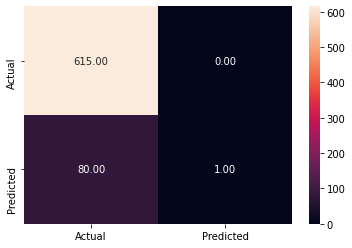

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_val,prediction)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Actual','Predicted'],yticklabels=['Actual','Predicted'])

#### **Predictions**

In [23]:
preds = model.predict(test_pixel_data)

In [24]:
predictions = []
for i in preds:
  if i[0] > 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


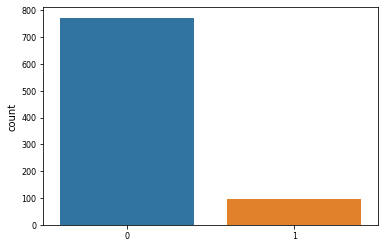

In [25]:
sns.countplot(predictions)

In [26]:
result = pd.DataFrame(predictions,columns=['prediction'])

result.to_csv('/content/vgg16_fine_tuning.csv',index=False)

In [27]:
result.value_counts()

prediction
0             772
1              98
dtype: int64